<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Подготовка-выборок" data-toc-modified-id="Подготовка-выборок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка выборок</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-модель" data-toc-modified-id="Линейная-модель-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Линейная модель</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#XGBRegressor" data-toc-modified-id="XGBRegressor-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>XGBRegressor</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Тестирование-модели-на-тестовой-выборке" data-toc-modified-id="Тестирование-модели-на-тестовой-выборке-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тестирование модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Важность признаков</a></span></li></ul></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Поставлена задача построить модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Выполнять поставленную задачу будем в следующей последовтельности:

1. Загрузим данные и выполним их ресемплирование по одному часу.
2. Проанализируем данные.
3. Обучитм разные модели с различными гиперпараметрами.
4. Проверим данные на тестовой выборке и сделем выводы.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from catboost import CatBoostRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  RandomizedSearchCV, TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

## Подготовка

Произведём закгрузку данных, первичный анализ данных и ресемплирование данных в соответствии с поставленной задачей - на интервал = 1 час.

In [2]:
# Загрузка данных
try:
    df = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])
except:
    df = pd.read_csv('D/Taxi_prediction/taxi.csv', parse_dates=[0], index_col=[0])

In [3]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [6]:
df.index.is_monotonic

True

In [7]:
# Ресемплирование по часам
df = df.resample('1H').sum()

**Вывод**

1. Данные загружены. 
2. Колонка `datetime` определена как индекс таблицы, тип данных в преобразован в `datetime`.
3. Пропуски отсутствуют.
4. Данные монотонны.
5. Период наблюдения: `2018-03-01 00:00:00` - `2018-08-31 23:50:00` с интеравалом 10 минут.
6. Так как поставлена задача прогнозирования заказов такси на следующий час, то произвели ресемплирование данных на 1 час.

## Анализ

Произведём анализ данных:
1. Для снижения колебаний применим скользящее среднее;
2. Для лучшего понимания временного ряда, разобъём его на тренды и сезонность.

In [8]:
# Скользящее среднее
df['mean'] = df['num_orders'].rolling(24).mean()

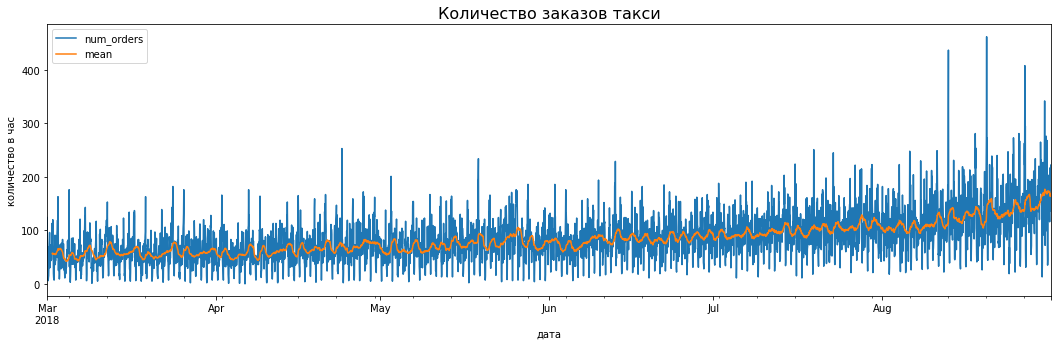

In [9]:
ax = df.plot(figsize=(18, 5))
ax.set_title('Количество заказов такси', fontsize=16)
ax.set(ylabel='количество в час', xlabel='дата');

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что ряд был визуализирован.
</div>

Для лучшей интерпретации количества заказов такси, произведём ресемплирование по дням.

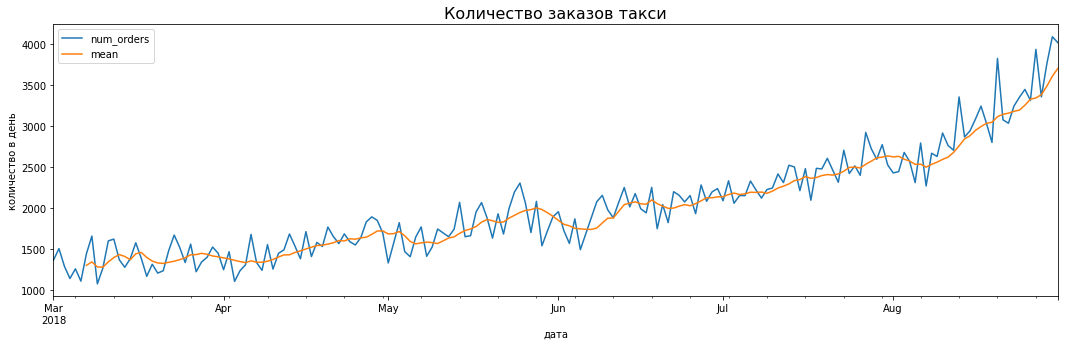

In [10]:
# Ресемплирование по дням
df_day = df.resample('1d').sum()
df_day['mean'] = df_day['num_orders'].rolling(7).mean()

ax = df_day.plot(figsize=(18, 5))
ax.set_title('Количество заказов такси', fontsize=16)
ax.set(ylabel='количество в день', xlabel='дата');

На графике видно, что в период с марта по август заказы такси росли. Для более подробного анализа необходимо произвести декомпозицию данных о заказах такси на тренд, сезонность и остатки.

In [11]:
# Декомпозиция
decomposed = seasonal_decompose(df['num_orders'].resample('1d').sum())

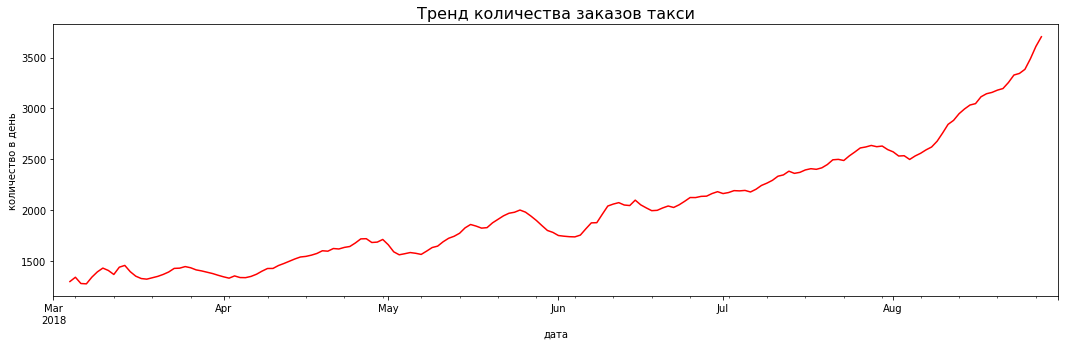

In [12]:
# тренд
ax = decomposed.trend.plot(figsize=(18, 5), color='r')
ax.set_title('Тренд количества заказов такси', fontsize=16)
ax.set(ylabel='количество в день', xlabel='дата');

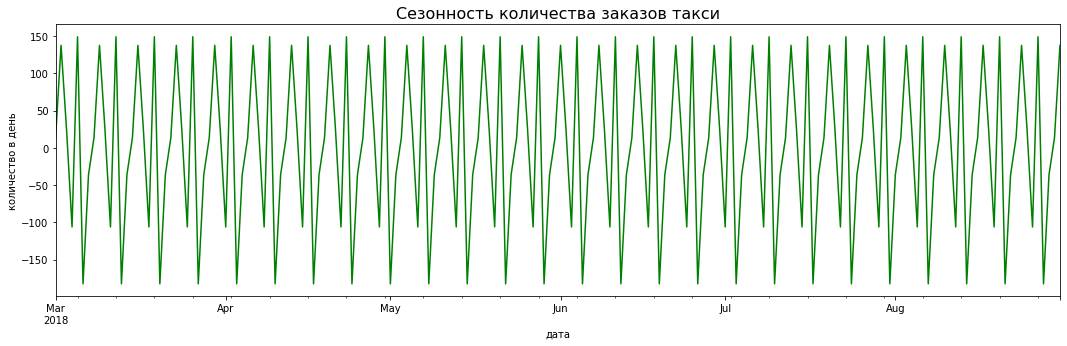

In [13]:
# сезонная составляющая
ax = decomposed.seasonal.plot(figsize=(18, 5), color='g')
ax.set_title('Сезонность количества заказов такси', fontsize=16)
ax.set(ylabel='количество в день', xlabel='дата');

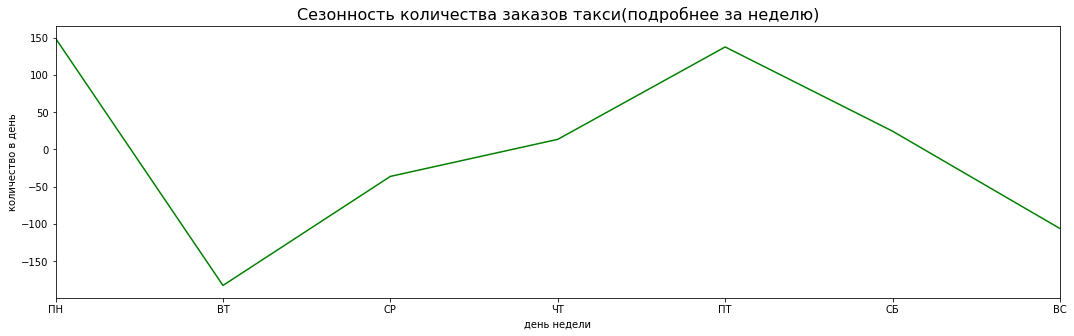

In [14]:
# сезонная составляющая за неделю
ax = decomposed.seasonal['2018-03-05 00:00:00':'2018-03-11 00:00:00'].plot(figsize=(18, 5), color='g')
ax.set_title('Сезонность количества заказов такси(подробнее за неделю)', fontsize=16)
ax.set(ylabel='количество в день', xlabel='день недели');
plt.xticks(decomposed.seasonal['2018-03-05 00:00:00':'2018-03-11 00:00:00'].index, ['ПН','ВТ','СР','ЧТ','ПТ','СБ','ВС']);

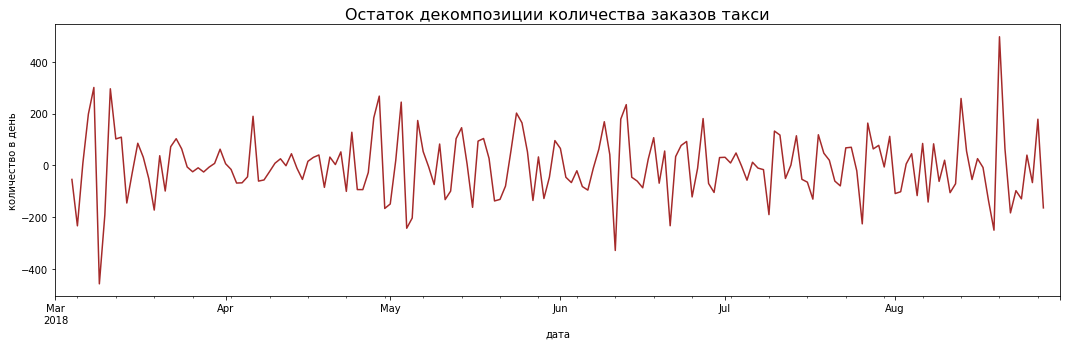

In [15]:
# остаток декомпозиции
ax = decomposed.resid.plot(figsize=(18, 5), color='brown')
ax.set_title('Остаток декомпозиции количества заказов такси', fontsize=16)
ax.set(ylabel='количество в день', xlabel='дата');

In [16]:
print('Стандартное отклонение количества заказов такси в день:', decomposed.resid.std())

Стандартное отклонение количества заказов такси в день: 123.28196551996496


При разложении временного ряда на составляющие видно:
1. Восходящий тренд - в целом, заказы такси с марта по август растут.
2. Недельная сезонность - внутри недели колебания количества заказов в пределах +- 150 в зависимости от дня недели.
3. Остаток декомпозиции составляет +-400 заказов со стандартным отклонением 120 заказов.

Для лучшего понимания как меняется количество заказов в течении недели и дня, рассмотрим более подробно промежуток времени размером в одну неделю.

In [18]:
# Заглянем внутрь одной недели
decomposed_week = seasonal_decompose(df.loc['2018-03-04 12:00:00':'2018-03-11 12:00:00', 'num_orders'])

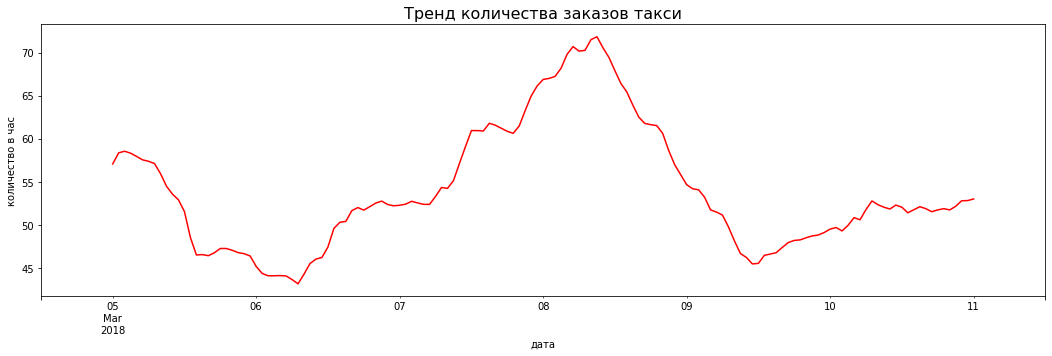

In [18]:
# Тренд
ax = decomposed_week.trend.plot(figsize=(18, 5), color='r')
ax.set_title('Тренд количества заказов такси', fontsize=16)
ax.set(ylabel='количество в час', xlabel='дата');

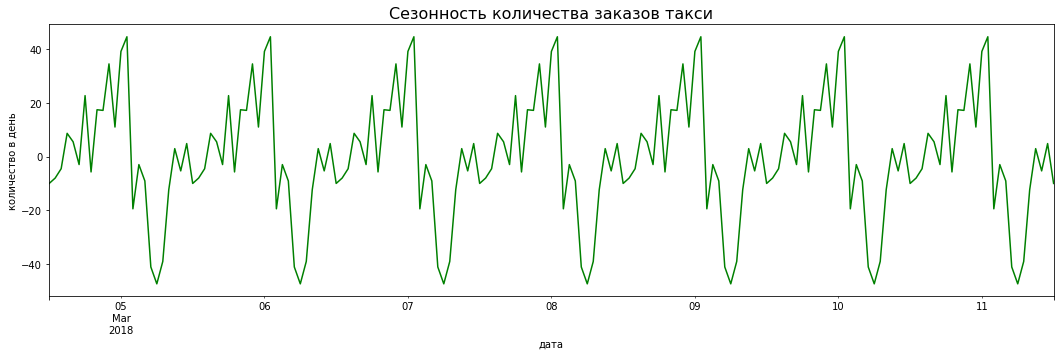

In [33]:
# Сезонность
ax = decomposed_week.seasonal.plot(figsize=(18, 5), color='g')
ax.set_title('Сезонность количества заказов такси', fontsize=16)
ax.set(ylabel='количество в день', xlabel='дата');

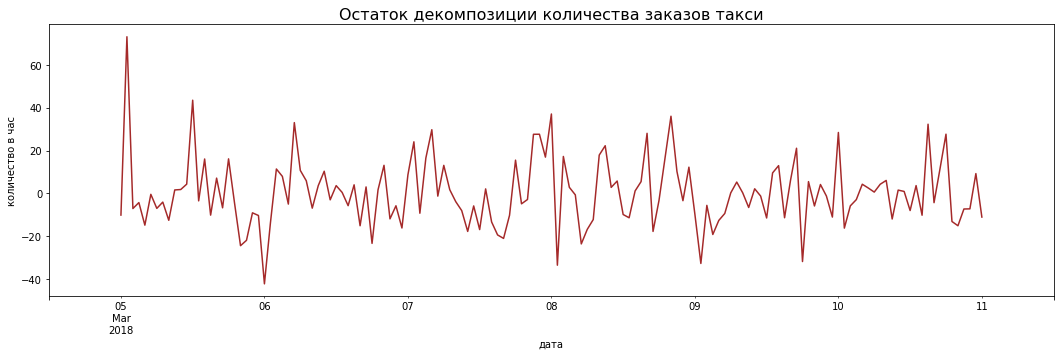

In [20]:
# Шум
ax = decomposed_week.resid.plot(figsize=(18, 5), color='brown')
ax.set_title('Остаток декомпозиции количества заказов такси', fontsize=16)
ax.set(ylabel='количество в час', xlabel='дата');

In [21]:
print('Стандартное отклонение количества заказов такси в час:', decomposed_week.resid.std())

Стандартное отклонение количества заказов такси в час: 16.045591914444984


###### **Вывод по разделу**

1. Наблюдается восходящий тренд количества заказов такси от марта к августу 2018 года.
2. Недельная сезонность. Количество заказов зависит от дня недели. Больше всего люди используют такси в понедельник и пятницу, меньше всего во вторник и воскресенье.
3. Также, таблюдается дневная сезонность. Заказы такси в одни и теже часы имеют схожий характер. Минимум заказов ночью. С 06 утра заказы начинают расти вплоть до 24 часов. 
4. Остаток декомпозиции имеет значительную величину:
    - часовая сезонность со стандартным отклонением = 16;
    - недельная сезонность со стандартным отклонением = 123.

## Обучение

1. Подготовим признаки;
2. Создадим выборки:
    - Тренировочную - для тренировки моделей;
    - Валидационную - для проверки качества моделей;
    - Тестовую - для тестирования созданных моделей.
3. Обучим несколько моделей и подберём гиперпараметры:
    - Линейную регрессию;
    - Решающее дерево;
    - Случайный лес;
    - CatBoostRegressor;
    - XGBRegressor


### Подготовка признаков

Создадим признаки:
1. Месяц, день и день недели;
2. Сдвиг данных;
3. Скользящее среднее.

Максимальное значение сдвига и размер окна для скользящего среднего определим опытным путём.

In [25]:
# Подготовка признаков

def make_features(data, max_lag, rolling_mean_size):
    """ Принимаем данные, максимальный сдвиг и окно для скользящего среднего
        Создаём признаки и записываем результаты напрямую в датафрейм
    """
    data = pd.DataFrame(data)
    # Создание признаков месяц, день, день недели
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    # Создание сдвигов
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    # Создание скользящего среднего
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data

# Вызов функции создания признаков
df_learn = make_features(df['num_orders'], 24, 30)

**Вывод**

Признаки подготовлены. Эксперементально определёно максимальное значение сдвига = 24ч и размер окна для скользящего среднего 30ч. Дальнейшее их увеличение не приводит к существенному повышению качества моделей.

### Подготовка выборок

In [26]:
# Подготовка выборок

# Делим на тренировочную - 80% и валидационную+тестовую - 20% выборки
train, test = train_test_split(df_learn,
                               shuffle=False, 
                               test_size=0.2, 
                               random_state=12345
                              )
# Удаляем пропуски, возникшие при создании признаков
train = train.dropna()

# Определяем признаки и целевой признак
features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']

features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

# Делим на валидационную и тестовую выборкт - по 10%
features_valid, features_test, target_valid, target_test = train_test_split(features_test, 
                                                                            target_test, 
                                                                            shuffle=False,
                                                                            test_size=0.5, 
                                                                            random_state=12345
                                                                           )
# проверим размеры выборок
pd.DataFrame(data=[features_train.shape[0], target_train.shape[0],
                   features_valid.shape[0], target_valid.shape[0],
                   features_test.shape[0],  target_test.shape[0]],
             index=['features_train', 'target_train', 
                    'features_valid', 'target_valid', 
                    'features_test',  'target_test'],
             columns=['Размер выборки']
            )

,Размер выборки
features_train,3502
target_train,3502
features_valid,442
target_valid,442
features_test,442
target_test,442


**Вывод**

Выборки подготовлены к обучению моделей.

### Обучение моделей

1. Для того, чтобы не дублировать код, создадим функции:
    - Для вычисления метрики качества RMSE и вывода на графике истинных и предсказанных моделью значений;
    - Для подбора гиперпараметров методом случайного поиска с перекрёстной проверкой.
2. Обучим несколько моделей и подберём гиперпараметры:
    - Линейную регрессию;
    - Решающее дерево;
    - Случайный лес;
    - CatBoostRegressor;
    - XGBRegressor.

In [28]:
def get_rmse_valid(model, X=features_train, y=target_train, X_test=features_valid, y_test=target_valid):
    """ Принимаем модель,
        возвращаем RMSE 
    """
    model.fit(X, y)
    predictions = model.predict(X_test)

    # Отображение предсказания и истинных значений
    ax = pd.DataFrame(data = {'Истинные':y_test, 'Прогнозируемые':predictions}).plot(figsize=(18, 5))
    ax.set_title('Количество заказов такси', fontsize=16)
    ax.set(ylabel='количество в час', xlabel='дата')
    
    return round(mean_squared_error(y_test, predictions, squared=False), 1)

In [29]:
def get_rmse_cv(model, parametrs, X=features_train.append(features_valid), y=target_train.append(target_valid)):
    """ Принимаем модель,
        возвращаем RMSE и время обучения и предсказания
    """
    rs = RandomizedSearchCV(model, 
                            parametrs, 
                            scoring='neg_root_mean_squared_error', 
                            cv=TimeSeriesSplit(n_splits=5).split(X),
                            random_state = 5555
                           )
    rs.fit(X, y)
    
    return round(rs.best_score_), rs.best_params_

#### Линейная модель

33.9

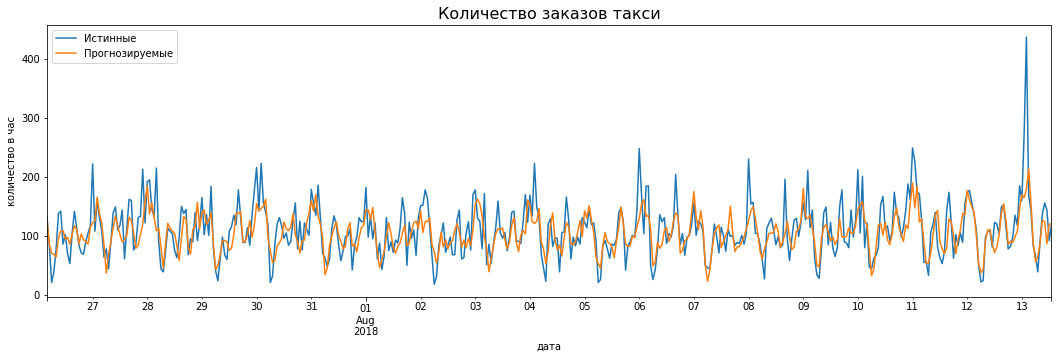

In [30]:
# Вызываем функцию расчёта RMSE
get_rmse_valid(LinearRegression())

#### Решающее дерево

39.7

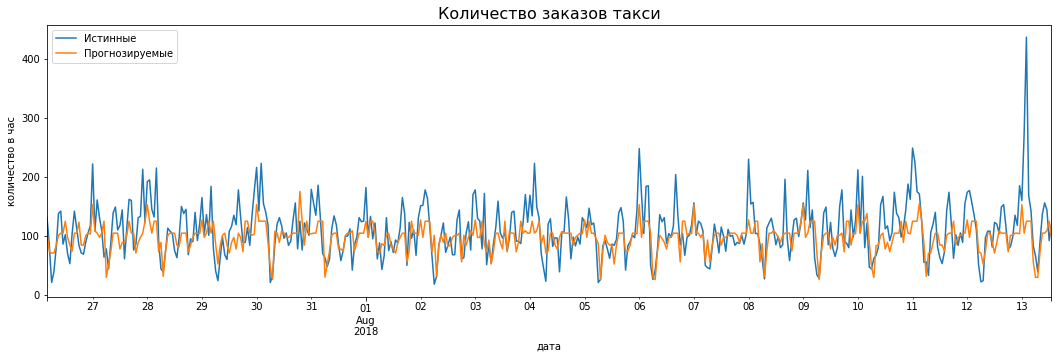

In [27]:
# Вызываем функцию расчёта RMSE
get_rmse_valid(DecisionTreeRegressor(max_depth=6, random_state=5555))

In [28]:
# Вызываем функцию подбора гиперпараметров
get_rmse_cv(DecisionTreeRegressor(random_state=5555), { 'max_depth':range(3,50)})

(-33, {'max_depth': 6})

#### Случайный лес

33.6

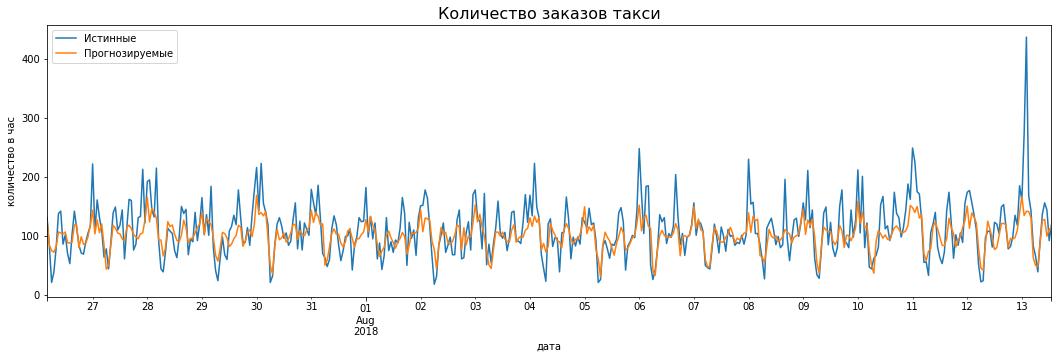

In [29]:
# Вызываем функцию расчёта RMSE
get_rmse_valid(RandomForestRegressor(n_estimators=100, max_depth=10, random_state=5555))

In [30]:
# Вызываем функцию подбора гиперпараметров
get_rmse_cv(RandomForestRegressor(random_state=5555), { 'n_estimators': range (80, 151, 10),
                                                        'max_depth': range (4, 21, 2)})

(-26, {'n_estimators': 140, 'max_depth': 18})

33.2

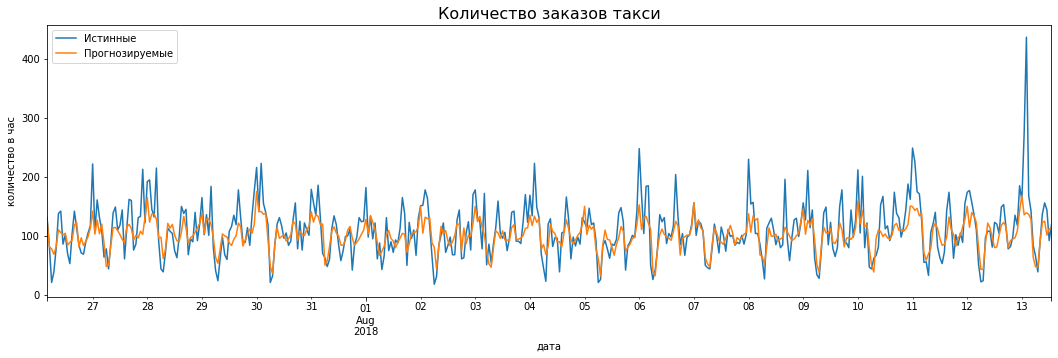

In [31]:
# Вызываем функцию расчёта RMSE для модели с подобранными гиперпараметрами
get_rmse_valid(RandomForestRegressor(n_estimators=140, max_depth=18, random_state=5555))

#### CatBoost

31.8

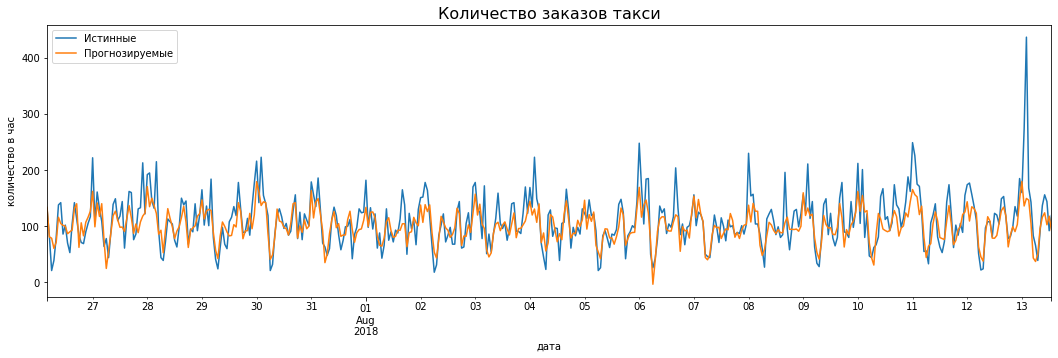

In [32]:
# Вызываем функцию расчёта RMSE
get_rmse_valid(CatBoostRegressor(silent=True, random_state=5555))

In [33]:
# Вызываем функцию подбора гиперпараметров
get_rmse_cv(CatBoostRegressor(silent=True, random_state=5555), 
            { 'l2_leaf_reg': range(1,10),
              'learning_rate': [0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1],
               'depth' : range(1,10)
            })

(-25, {'learning_rate': 0.02, 'l2_leaf_reg': 7, 'depth': 6})

32.6

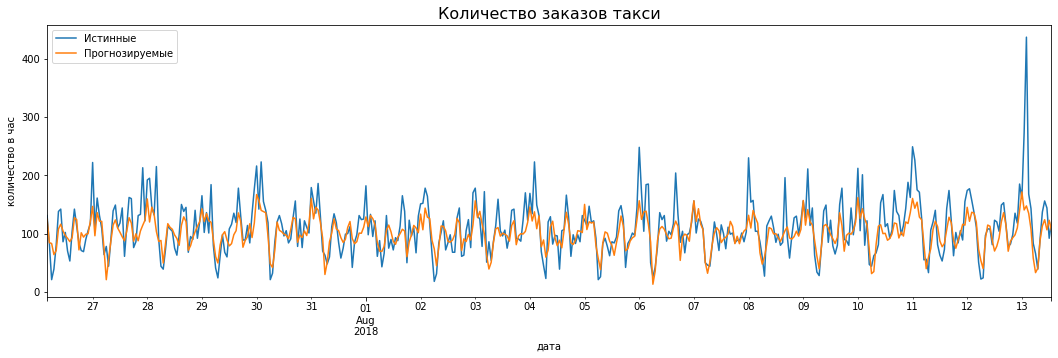

In [37]:
# Вызываем функцию расчёта RMSE для модели с подобранными гиперпараметрами
get_rmse_valid(CatBoostRegressor(learning_rate=0.02, l2_leaf_reg=7, depth=6, silent=True, random_state=5555))

#### XGBRegressor

34.9

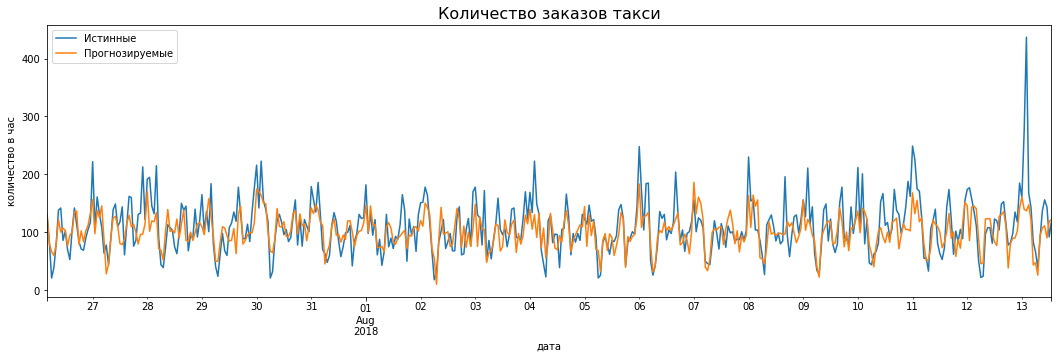

In [35]:
# Вызываем функцию расчёта RMSE
get_rmse_valid(XGBRegressor(random_state=5555))

In [38]:
# Вызываем функцию подбора гиперпараметров
get_rmse_cv(XGBRegressor(random_state=5555), 
            { 'n_estimators': range (80, 151, 10),
              'learning_rate': [0.01, 0.02, 0.05, 0.08, 0.1, 0.2],
              'n_jobs': range(1,11)
           })

(-26, {'n_jobs': 8, 'n_estimators': 110, 'learning_rate': 0.08})

32.9

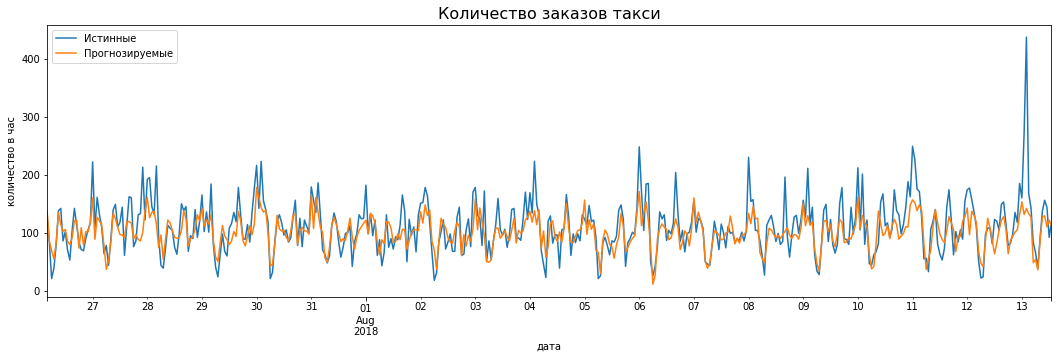

In [39]:
# Вызываем функцию расчёта RMSE для модели с подобранными гиперпараметрами
get_rmse_valid(XGBRegressor(n_jobs=8, n_estimators=110, learning_rate=0.08, random_state=5555))

**Вывод**

Произвели обучение и подбор гиперпараметров для нескольких моделей. Наименьшее значение ошибки RMSE показала модель CatBootRegressor RMSE=31.8. Модели XGBRegressor также показывают достаточно хорошее качество: RMSE=32.9. Далее с RMSE=33.2 идёт модель Случайный лес. Не далеко от них отстала и линейная регрессия с RMSE=34. Только Решающее дерево отстало существенно, RMSE=39.

**Вывод по разделу**

В данном разделе произвели:
1. Создание признаков;
2. Разделение данных на выборки;
3. Обучение и подбор гиперпараметров к нескольким моделям.

Наилучшее качество прогнозирования показали модели CatBootRegressor и XGBRegressor. Остальные модели показали несколько худший результат.

## Тестирование

1. Протестируем на тестовой выборке модели, показавшую лучшее качество на валидационной выборке:
    - CatBootRegressor;
    - XGBRegressor.
2. Сравним результат работы модели на тестовой выборке с результатами константной модели и модели прогнозирующей предъидущим значением.
3. Посмотрим на важность признаков.

### Тестирование модели на тестовой выборке

41.4

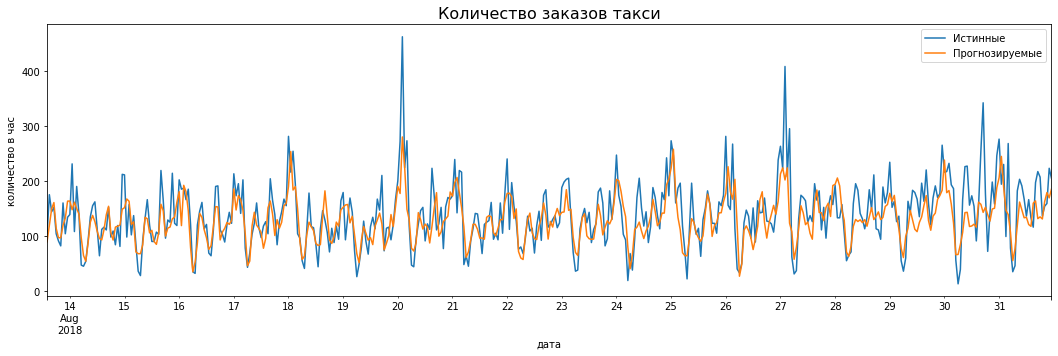

In [40]:
get_rmse_valid(CatBoostRegressor(silent=True, random_state=5555),
               X=features_train.append(features_valid),
               y=target_train.append(target_valid),
               X_test=features_test,
               y_test=target_test
              )

45.1

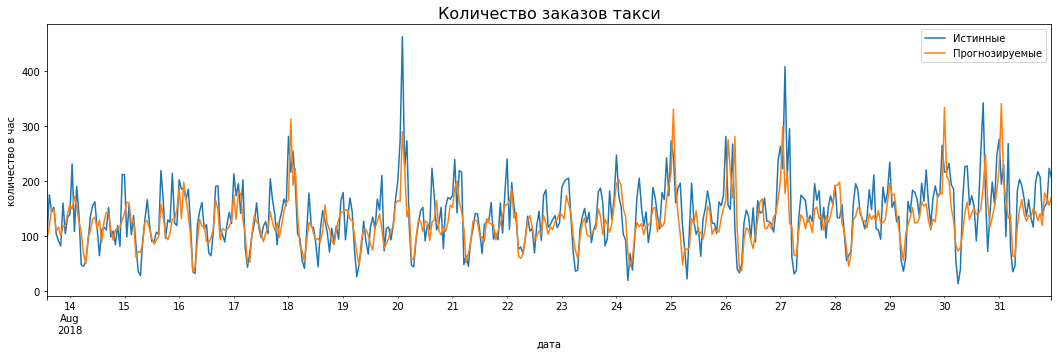

In [41]:
get_rmse_valid(XGBRegressor(n_jobs=8, n_estimators=110, learning_rate=0.08, random_state=5555),
               X=features_train.append(features_valid),
               y=target_train.append(target_valid),
               X_test=features_test,
               y_test=target_test
              )

**Вывод**

На тестовой выборке модели показывают несколько худший результат по сравнению с валидационной. Лучшее качество прогнозирования у CatBoostRegressor.

### Проверка модели на адекватность

Произведём сравнение качества работы модели на тестовой выборке с качеством прогнозирования константной модели и модели прогнозирующей предъидущим значением.

In [42]:
# Рассчитаем RMSE для константной модели
print('RMSE =', mean_squared_error(target_test, (np.ones(target_test.shape[0]) * target_test.median()), squared=False))

RMSE = 58.7266464607412


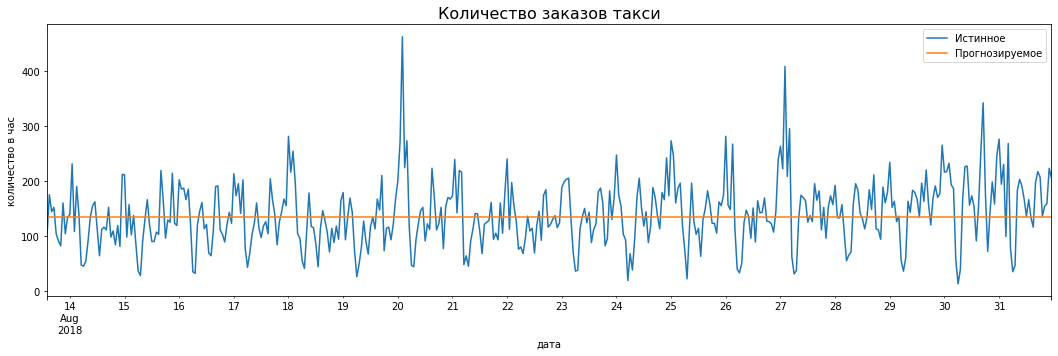

In [43]:
# Отображение предсказаний константной модели
ax = pd.DataFrame(data = {'Истинное':target_test, 'Прогнозируемое':(np.ones(target_test.shape[0]) * target_test.median())}).plot(figsize=(18, 5))
ax.set_title('Количество заказов такси', fontsize=16)
ax.set(ylabel='количество в час', xlabel='дата');

In [44]:
# Рассчитаем RMSE для модели прогнозирующей по предъидущему шагу
pred_previous = target_test.shift(fill_value=target_train.iloc[-1])
print('RMSE =', mean_squared_error(target_test, pred_previous, squared=False))

RMSE = 58.88016052260236


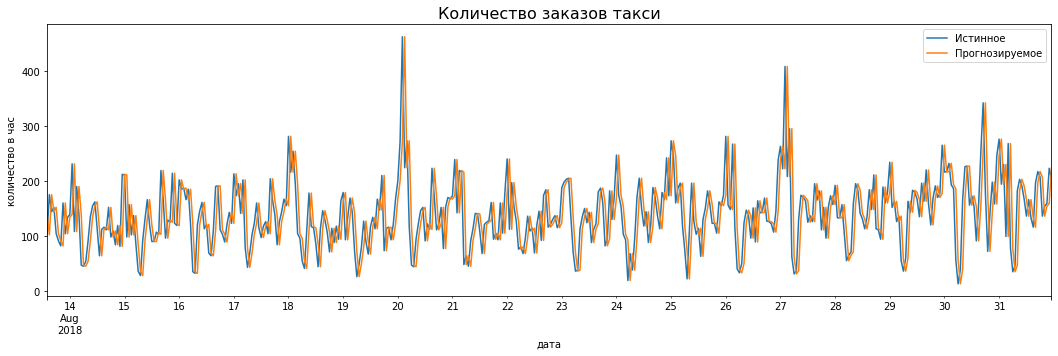

In [45]:
# Отображение предсказаний по предъидущим значениям
# fig = plt.figure(figsize=(18, 5))
# plt.plot(pd.DataFrame(data = {'y':target_test, 'p':pred_previous}))

ax = pd.DataFrame(data = {'Истинное':target_test, 'Прогнозируемое':pred_previous}).plot(figsize=(18, 5))
ax.set_title('Количество заказов такси', fontsize=16)
ax.set(ylabel='количество в час', xlabel='дата');

**Вывод**

Константная модель и модель прегнозирующая по предъидущему шагу показывают худшее качество по сравнению с созданными моделями.

### Важность признаков

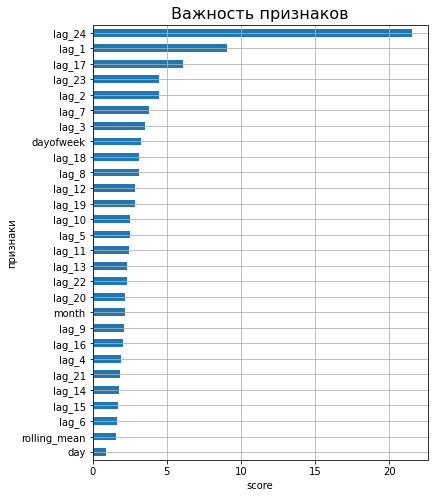

In [46]:
model = CatBoostRegressor(silent=True, random_state=5555)

# Обучение модели
model.fit(features_train, target_train)
# Выделим признаки
efectiv_score = pd.DataFrame(data={'score': model.feature_importances_}, 
                            index=features_train.columns).sort_values(by='score')
# Выведем их на экран
ax = efectiv_score.plot(kind='barh', grid=True, figsize=(6,8), legend=False);
ax.set_title("Важность признаков", fontsize=16)
ax.set_ylabel("признаки")
ax.set_xlabel("score")
plt.show;

**Вывод**

Самым важным признаком яадяется сдвиг на 24 часа. Это не удевительно, так как в одни и теже часы поведение пассажиров такси схоже. Второй признак по важности - сдвиг на 1 час. Это обусловлено тем, что данные за прошедший час близки к прогнозируемым.

**Вывод по разделу**

По результатам тестирования, наибольшее качество работы показала модель CatBoostRegressor. При сравнении с константной моделью и моделью предсказывающей предъидущим значением, созданная модель доказывает адекватность работы. Проанализирована важность признаков для работы модели. Наибольшую важность для работы модели имеют признаки: сдвиг на 24 часа и сдвиг на 1 час.

**Итоговый вывод**

На этапе подготовки данных произвели первичный анализ данных и ресемплирование данных в соответствии с поставленной задачей.

Далее проанализировали данные с помощью разделения данных на составляющие: тренд, сезонность и остаток. Наблюдается восходящий тренд количества заказов такси на протяжении всего периода наблюдения. Активность клиентов такси имеет характер недельной и дневной сезонности. Пики использования такси для поездок в аэропорт - понедельник и пятница. Меньше всего заказов в четверг. Дневная сезонность выражена наименьшим числом заказов в ночные часы, и плавным ростом активности поездок с утра и до вечера.

Для обучения моделей были созданы признаки путём сдвига данных, добавления скользящего среднгего и создания признаков содержащих день, день недели и месяц. Затем было произведено обучение с подбором гиперпараметров нескольких моделей. Для тестирования были выбраны две модели показавшие наилучшее качество: CatBoostRegressor и XGBRegressor.

По результатам тестирования и проверки выбранных моделей на адекватность, окончательный выбор модели предлагается сделать в пользу модели  CatBoostRegressor с гиперпараметрами по умолчанию. На тестовой выборке удалось достичь показателя RMSE = 41.4, что меньше целевого. 

Таким образом, задача по созданию модели прогнозирующей количество заказов такси на следующий час считаю выполненной. Одним из путей повышение качества модели может быть добавление в качестве признаков расписания авиарейсов.